In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# np.meshgrid?
# np.linspace?
# np.zeros?
# plt.contourf?
# np.linalg.lstsq?

In [3]:
data_count = 100

In [4]:
x_tensor = torch.linspace(-5, 5, data_count)
x_variable = Variable(x_tensor)
x_np = x_tensor.numpy()

In [5]:
y_np = 2*x_np + 3

In [6]:
noise = np.random.normal(0, 0.1, data_count)

In [7]:
y_np = y_np + noise

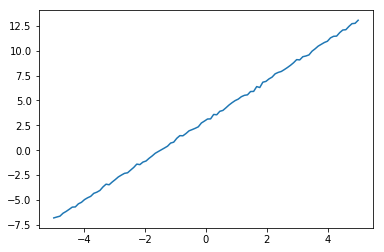

In [8]:
plt.plot(x_np, y_np)

In [9]:
x_np.shape
y_np.shape
noise.shape

(100,)

In [10]:
w_init = 1000.0
b_init = 1000.0
w = w_init
b = b_init

In [11]:
def forward(x):
    return x*w+b

In [12]:
def loss(x, y):
    y_pred = forward(y)
    return (y_pred-y)*(y_pred-y)

In [13]:
def gradient_w(x, y):
    # 优化的loss对w的梯度，使用链式法则进行求解
    return 2*(x*w+b-y)*x

In [14]:
def gradient_b(x, y):
    # 优化的loss对w的梯度，使用链式法则进行求解
    return 2*(x*w-y+b)

In [15]:
def gradient(x, y):
    g = np.zeros((2,1))
    g[0][0]=gradient_w(x,y)
    g[1][0]=gradient_b(x,y)
    return g

In [16]:
def hessian(x, y):
    h = np.zeros((2,2))
    h[0][0] = 2*x*x
    h[0][1] = 2*x
    h[1][0] = 2*x
    h[1][1] = 2
    return h